In [2]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt
# header to start
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mp
import pickle
import IPython
import scipy.linalg

In [3]:


def make_animation(plotx,E,xl=(-2,2),yl=(-2,2),inter=25, display=False):
    '''
    takes a graph and motion of vertexes in 2D and returns an animation
    E: list of edges (each edge is a pair of vertexes)
    plotx: a matrix of states ordered as (x1, y1, x2, y2, ..., xn, yn) in the rows and time in columns
    xl and yl define the display boundaries of the graph
    inter is the interval between each point in ms
    '''
    fig = mp.figure.Figure()
    mp.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=xl, ylim=yl)
    ax.grid()

    list_of_lines = []
    for i in E: #add as many lines as there are edges
        line, = ax.plot([], [], 'o-', lw=2)
        list_of_lines.append(line)

    def animate(i):
        for e in range(len(E)):
            vx1 = plotx[2*E[e][0],i]
            vy1 = plotx[2*E[e][0]+1,i]
            vx2 = plotx[2*E[e][1],i]
            vy2 = plotx[2*E[e][1]+1,i]
            list_of_lines[e].set_data([vx1,vx2],[vy1,vy2])
        return list_of_lines
    
    def init():
        return animate(0)


    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=inter, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    if(display==True):
        IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))
    return ani



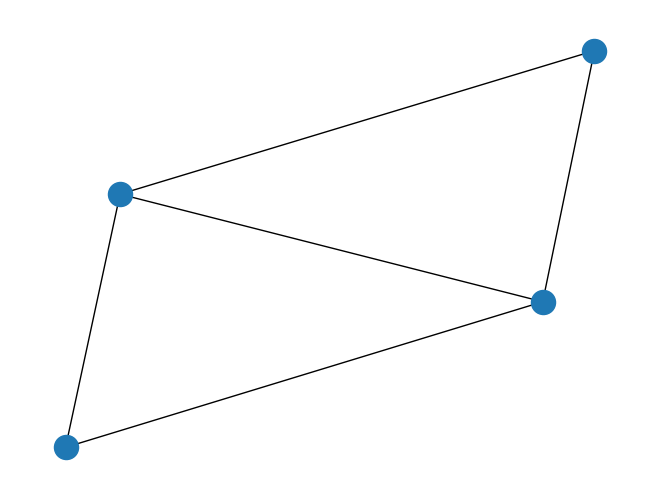

In [4]:
N = 4
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edge(0,1,length=1)
G.add_edge(1,2,length = 1)
G.add_edge(0,2,length=np.sqrt(2))
G.add_edge(0,3,length=1.5)
G.add_edge(2,3,length=1.5)
nx.draw(G)
# simulation time
time = 15
dt = 0.01
T = int(time/dt) # timestep
k = 0.5
u = np.zeros((T, N, 2))
x = np.zeros((T, N, 2))
L = nx.laplacian_matrix(G).toarray()
D = nx.incidence_matrix(G, oriented=False).toarray()
zref = np.array([[1,1], [np.sqrt(2), np.sqrt(2)], [1.5, 1.5], [1, 1], [1.5, 1.5]])
x[0] = np.random.uniform(-2,2,(N, 2))
# u = -kLx + kDz_{ref}
for t in range(1, T):
    u[t-1] = -k * D@D.T @ x[t-1] + k * D @ zref
    x[t] = x[t - 1] + u[t-1]*dt

In [5]:
E = list(G.edges())
print('the list of edges is:')
print(E)
time = np.arange(0, T)
X = np.zeros((8,T))
for i in range(T):
    X[0,i] = x[i, 0, 0]
    X[1,i] = x[i, 0, 1]
    X[2,i] = x[i, 1, 0]
    X[3,i] = x[i, 1, 1]
    X[4,i] = x[i, 2, 0]
    X[5,i] = x[i, 2, 1]
    X[6,i] = x[i, 3, 0]
    X[7,i] = x[i, 3, 1]
# plotx = x[:,::50]
ani_random = make_animation(X, E,xl=(-3,3),yl=(-3,3),inter=10, display=True)
writervideo = animation.FFMpegWriter(fps=20)
ani_random.save('anim_random.mp4', writer=writervideo)

MovieWriter stderr:
[libopenh264 @ 0x55d34cd19400] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



the list of edges is:
[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '100.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp4epzyxhh/temp.m4v']' returned non-zero exit status 1.